In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as al
from sklearn.metrics import confusion_matrix ,accuracy_score, classification_report

## **1. PRE-PROCESSING**

Kết nối Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Liên kết với thư mục SIC (thư mục này tự tạo trên Drive, bên trong chứa file data)


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SIC/diabetes_prediction.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,0,25.19,6.6,140,0
1,Female,54.0,0,0,0,27.32,6.6,80,0
2,Male,28.0,0,0,0,27.32,5.7,158,0
3,Female,36.0,0,0,1,23.45,5.0,155,0
4,Male,76.0,1,1,1,20.14,4.8,155,0


## **2. Data Preprocessing**




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99977 entries, 0 to 99976
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               99977 non-null  object 
 1   age                  99977 non-null  float64
 2   hypertension         99977 non-null  int64  
 3   heart_disease        99977 non-null  int64  
 4   smoking_history      99977 non-null  int64  
 5   bmi                  99977 non-null  float64
 6   HbA1c_level          99977 non-null  float64
 7   blood_glucose_level  99977 non-null  int64  
 8   diabetes             99977 non-null  int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 6.9+ MB


In [ ]:
# Số quan sát và số thuộc tính của bộ dữ liệu trước khi xử lý
df.shape

(99977, 9)

In [ ]:
#Lấy tên các cột trong dataframe :
cols = df.columns
print(f"Tên các cột : {cols}")

Tên các cột : Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


In [ ]:
#Loại bỏ dữ liệu trùng lắp :
df = df.drop_duplicates()
#Loại bỏ dữ liệu bị null :
df = df.dropna()
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,0,25.19,6.6,140,0
1,Female,54.0,0,0,0,27.32,6.6,80,0
2,Male,28.0,0,0,0,27.32,5.7,158,0
3,Female,36.0,0,0,1,23.45,5.0,155,0
4,Male,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99971,Female,36.0,0,0,0,24.60,4.8,145,0
99973,Female,2.0,0,0,0,17.37,6.5,100,0
99974,Male,66.0,0,0,1,27.83,5.7,155,0
99975,Female,24.0,0,0,0,35.42,4.0,100,0


In [ ]:
#Gọi thư viện LabelEncoder :
from sklearn.preprocessing import LabelEncoder

#Khởi tạo đối tượng :
label_encoder = LabelEncoder()

#Lọc ra dữ liệu dạng chuỗi và lấy tên các cột trong có dữ liệu dạng chuỗi :
data_string_cols = df.select_dtypes(exclude=[np.number]).columns
print(data_string_cols)
print(df[data_string_cols].head())

Index(['gender'], dtype='object')
   gender
0  Female
1  Female
2    Male
3  Female
4    Male


In [ ]:
#Dùng phương thức fit_transform của đối tượng label_encoder đã khai báo ở trên :
#Để thực hiện việc chuẩn hoá dữ liệu dạng chuỗi thành số :
for col in data_string_cols:
  df[col] = label_encoder.fit_transform(df[col])

df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99971,0,36.0,0,0,0,24.60,4.8,145,0
99973,0,2.0,0,0,0,17.37,6.5,100,0
99974,1,66.0,0,0,1,27.83,5.7,155,0
99975,0,24.0,0,0,0,35.42,4.0,100,0


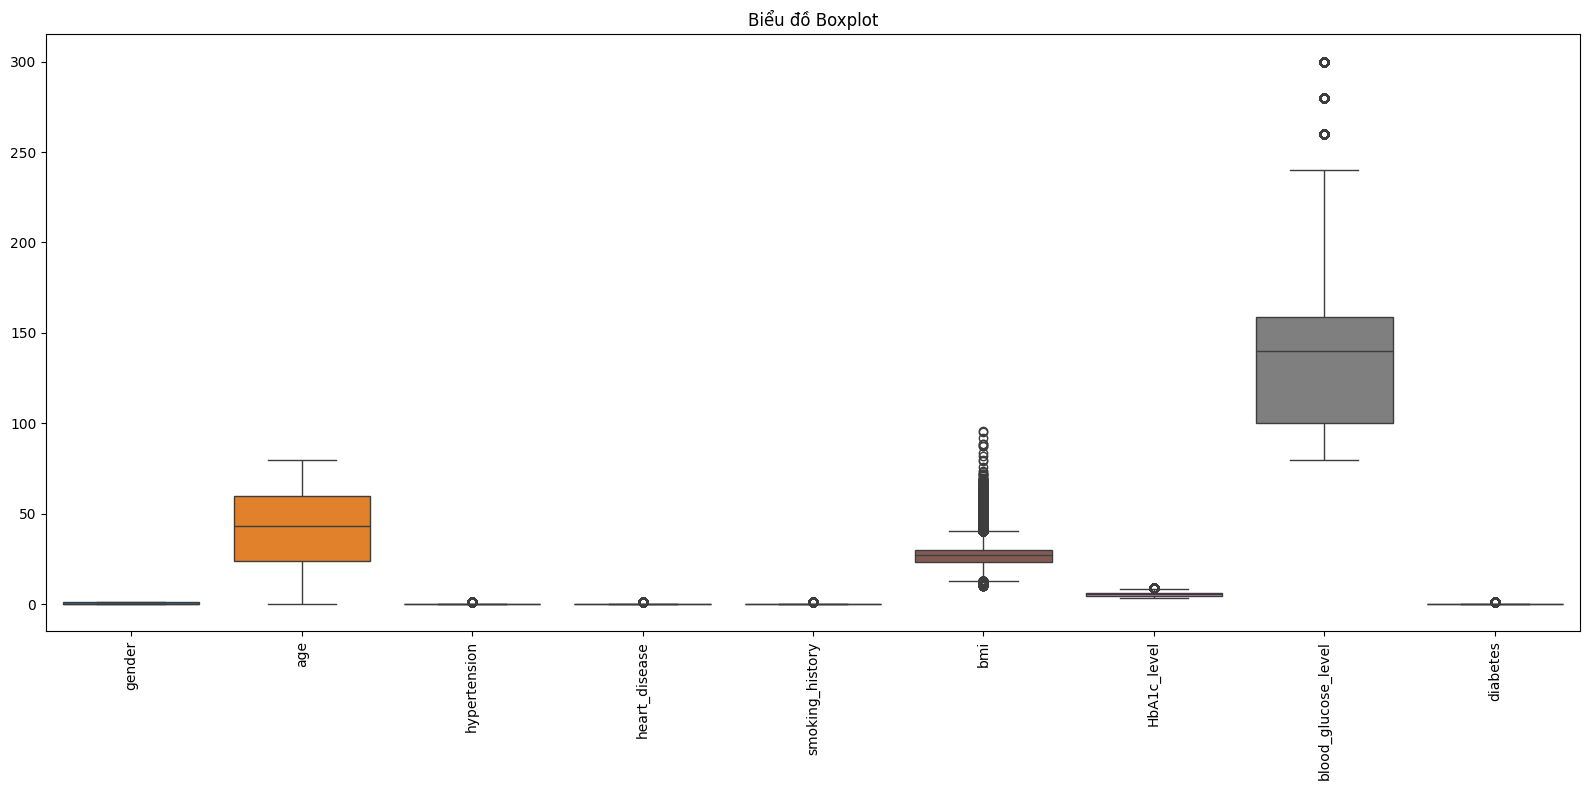

In [ ]:
#Thực hiện kiểm tra các giá trị ngoại biên và loại bỏ nó :
#Dùng seaborn để xem thử các giá trị ngoại biên :
#Tạo lưới subplot 1 hàng và 2 cột :
plt.figure(figsize=(16, 8))

#Biểu đồ Boxplot của df :
sns.boxplot(data=df)
plt.xticks(range(len(df.columns)), df.columns, rotation=90)
plt.title("Biểu đồ Boxplot")

#Hiển thị biểu đồ :
plt.tight_layout()
plt.show()

In [ ]:
#Phân vị thứ nhất tương ứng với giá trị ở vị trí thứ 25% của mẫu dữ liệu :
q1 = df.quantile(0.25)

#Phân vị thứ ba tương ứng với giá trị ở vị trí thứ 75% của mẫu dữ liệu :
q3 = df.quantile(0.75)

#Tính IQR (Khoảng tứ phân vị) :
iqr = q3 - q1

iqr

,0
gender,1.00
age,36.00
hypertension,0.00
heart_disease,0.00
smoking_history,0.00
bmi,6.86
HbA1c_level,1.40
blood_glucose_level,59.00
diabetes,0.00


In [ ]:
df_hypertension	= df['hypertension'].unique()
df_heart	= df['heart_disease'].unique()
df_diabetes	= df['diabetes'].unique()
df_smoking_history	= df['smoking_history'].unique()

print(df_hypertension)
print(df_heart)
print(df_diabetes)
print(df_smoking_history)

[0 1]
[1 0]
[0 1]
[0 1]


In [ ]:
iqr['heart_disease'] = iqr['heart_disease'] + 1
iqr['hypertension'] = iqr['hypertension'] + 1
iqr['diabetes'] = iqr['diabetes'] + 1
iqr['smoking_history']= iqr['smoking_history'] + 1

iqr

,0
gender,1.00
age,36.00
hypertension,1.00
heart_disease,1.00
smoking_history,1.00
bmi,6.86
HbA1c_level,1.40
blood_glucose_level,59.00
diabetes,1.00


In [ ]:
#Tính biên dưới và biên trên :
bien_duoi = q1 - 1.5*iqr
bien_tren = q3 + 1.5*iqr


#Loại bỏ các giá trị nằm phía dưới biên dưới hoặc nằm phía trên biên trên :
#Dùng mệnh đề phũ đinh ~ any để loại bỏ :
df_no_outlier = df[~((df < bien_duoi) |
                              (df > bien_tren))
                              .any(axis = 1)]

df_no_outlier

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99971,0,36.0,0,0,0,24.60,4.8,145,0
99973,0,2.0,0,0,0,17.37,6.5,100,0
99974,1,66.0,0,0,1,27.83,5.7,155,0
99975,0,24.0,0,0,0,35.42,4.0,100,0


## **3. VISUALIZE**

*My - Gender & Age*


In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [ ]:
df_out = df[['gender', 'diabetes']]

df_out = df_out.groupby(['gender', 'diabetes']).size().reset_index(name='Count')

df_out = df_out.pivot(index='gender', columns='diabetes', values='Count')

df_out = df_out.rename(columns={0: 'Không tiểu đường', 1: 'Tiểu đường'})

df_out = df_out.reset_index().rename(columns={'gender': 'Giới tính'})


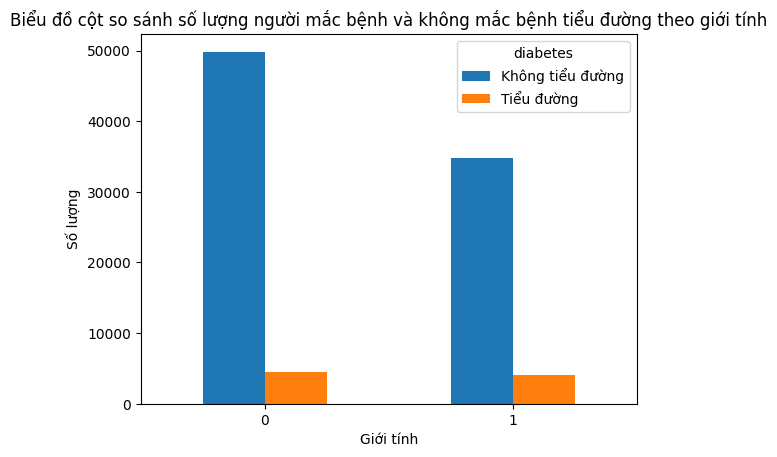

In [ ]:
df_out.plot(x='Giới tính', kind='bar', rot=0)

# Adding titles and labels
plt.title('Biểu đồ cột so sánh số lượng người mắc bệnh và không mắc bệnh tiểu đường theo giới tính')
plt.ylabel('Số lượng')

# Display the plot
plt.show()

<ipython-input-57-7af1d73006ba>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_out = df_out.groupby(['age_group', 'diabetes']).size().reset_index(name='Count')


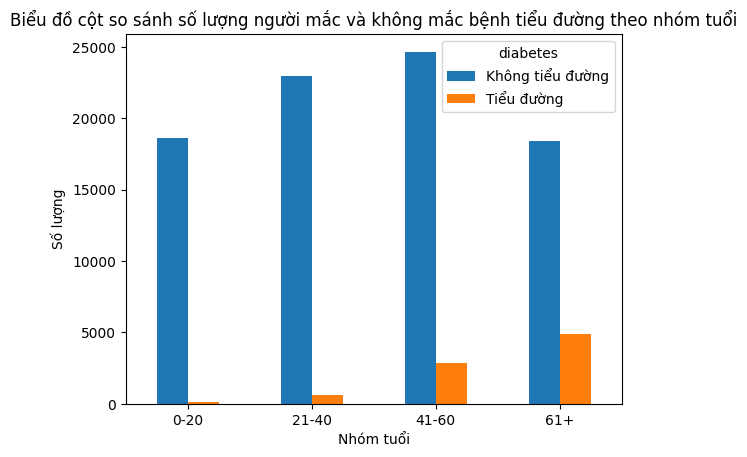

In [ ]:
bins = [0, 20, 40, 60, float('inf')]
labels = ['0-20', '21-40', '41-60', '61+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df_out = df[['age_group', 'diabetes']]
df_out = df_out.groupby(['age_group', 'diabetes']).size().reset_index(name='Count')
df_out = df_out.pivot(index='age_group', columns='diabetes', values='Count')
df_out = df_out.rename(columns={0: 'Không tiểu đường', 1: 'Tiểu đường'})
df_out = df_out.fillna(0)
df_out = df_out.reset_index().rename(columns={'age_group': 'Nhóm tuổi'})
df_out.plot(x='Nhóm tuổi', kind='bar', rot=0)
plt.title('Biểu đồ cột so sánh số lượng người mắc và không mắc bệnh tiểu đường theo nhóm tuổi')
plt.ylabel('Số lượng')
plt.show()


Khánh Linh - HbA1c level(Hemoglobin A1c) & Blood glucose level


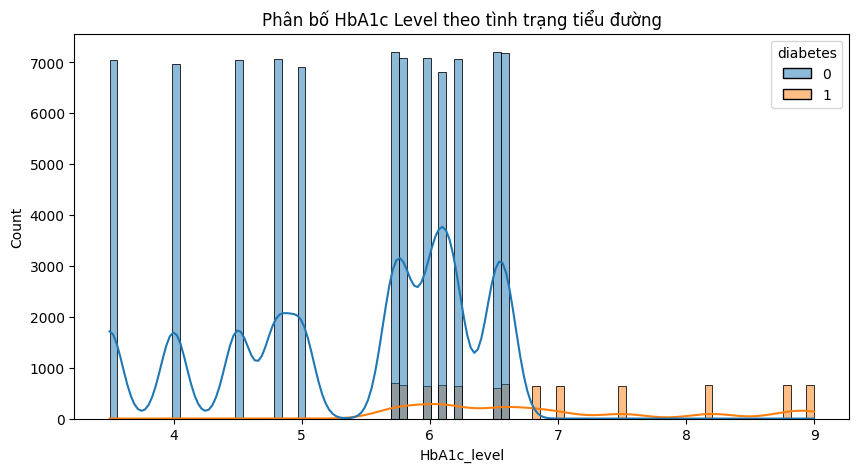

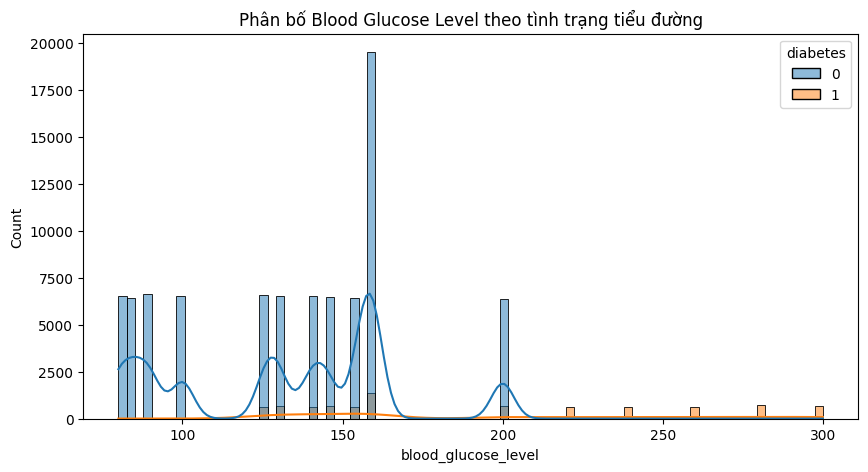

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='HbA1c_level', hue='diabetes', kde=True)
plt.title('Phân bố HbA1c Level theo tình trạng tiểu đường')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='blood_glucose_level', hue='diabetes', kde=True)
plt.title('Phân bố Blood Glucose Level theo tình trạng tiểu đường')
plt.show()


Gia Linh - Smoking history



/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


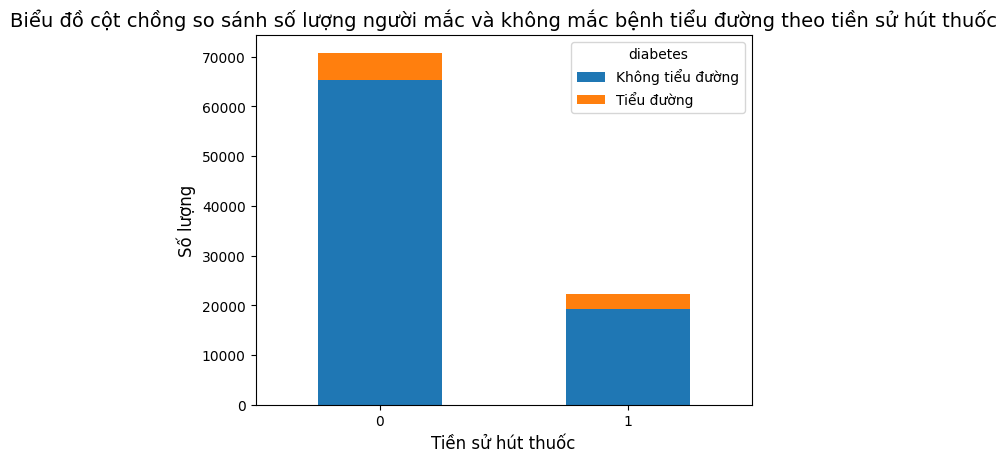

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
# Filter to include only 'smoking_history' and 'diabetes' columns
df_smoking = df[['smoking_history', 'diabetes']]

df_smoking = df_smoking.groupby(['smoking_history', 'diabetes']).size().reset_index(name='Count')

df_smoking = df_smoking.pivot(index='smoking_history', columns='diabetes', values='Count')

df_smoking = df_smoking.rename(columns={0: 'Không tiểu đường', 1: 'Tiểu đường'})

df_smoking = df_smoking.fillna(0)

df_smoking = df_smoking.reset_index().rename(columns={'smoking_history': 'Tiền sử hút thuốc'})

df_smoking_melted = df_smoking.melt(id_vars='Tiền sử hút thuốc', var_name='Tình trạng', value_name='Số lượng')

chart = alt.Chart(df_smoking_melted).mark_bar().encode(
    x=alt.X('Tiền sử hút thuốc:N', axis=alt.Axis(title='Tiền sử hút thuốc', labelAngle=-45)),
    y=alt.Y('Số lượng:Q', axis=alt.Axis(title='Số lượng')),
    color='Tình trạng:N',
    tooltip=['Tiền sử hút thuốc', 'Tình trạng', 'Số lượng']
).properties(
    title='Biểu đồ cột chồng so sánh số lượng người mắc và không mắc bệnh tiểu đường theo tiền sử hút thuốc'
).interactive()

chart.save('smoking_history_diabetes_stacked_bar_chart.json')

df_smoking.plot(x='Tiền sử hút thuốc', kind='bar', stacked=True, rot=0)

plt.xlabel('Tiền sử hút thuốc', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.title('Biểu đồ cột chồng so sánh số lượng người mắc và không mắc bệnh tiểu đường theo tiền sử hút thuốc', fontsize=14)


plt.show()

Quý - Hypertension & Heart Disease

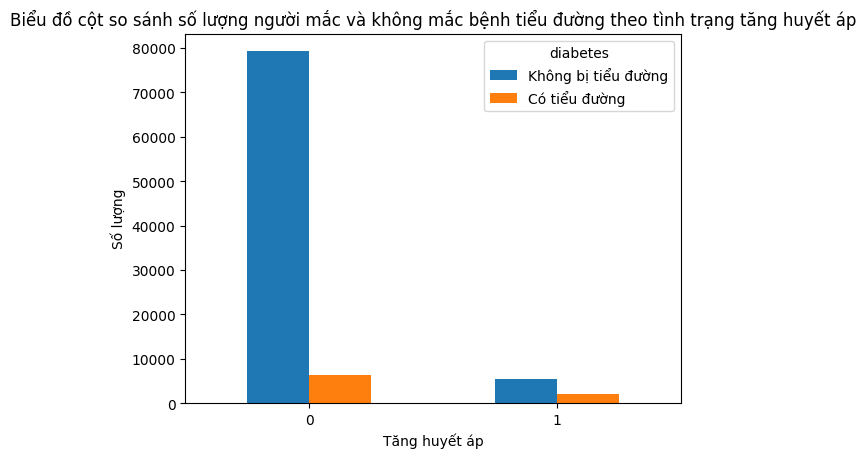

In [ ]:
df_hbp = df[['hypertension', 'diabetes']]

df_hbp = df_hbp.groupby(['hypertension', 'diabetes']).size().reset_index(name='Count')

df_hbp = df_hbp.pivot(index='hypertension', columns='diabetes', values='Count')

df_hbp = df_hbp.rename(columns={0: 'Không bị tiểu đường', 1: 'Có tiểu đường'})

df_hbp = df_hbp.reset_index().rename(columns={'hypertension': 'Tăng huyết áp'})

df_hbp.plot(x='Tăng huyết áp', kind='bar', rot=0)
plt.title('Biểu đồ cột so sánh số lượng người mắc và không mắc bệnh tiểu đường theo tình trạng tăng huyết áp')
plt.ylabel('Số lượng')
plt.show()

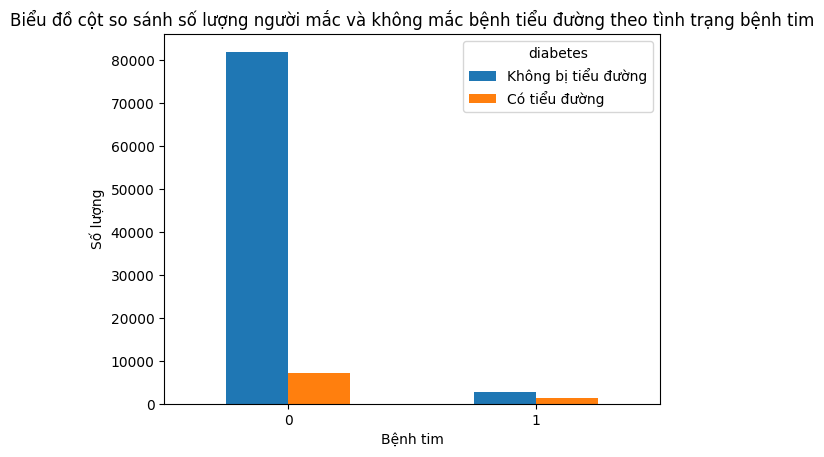

In [ ]:
df_hd = df[['heart_disease', 'diabetes']]

df_hd = df_hd.groupby(['heart_disease', 'diabetes']).size().reset_index(name='Count')

df_hd = df_hd.pivot(index='heart_disease', columns='diabetes', values='Count')

df_hd = df_hd.rename(columns={0: 'Không bị tiểu đường', 1: 'Có tiểu đường'})

df_hd = df_hd.reset_index().rename(columns={'heart_disease': 'Bệnh tim'})

df_hd.plot(x='Bệnh tim', kind='bar', rot=0)
plt.title('Biểu đồ cột so sánh số lượng người mắc và không mắc bệnh tiểu đường theo tình trạng bệnh tim')
plt.ylabel('Số lượng')
plt.show()

Mai - Bệnh nhân mắc bệnh tiểu đường theo BMI


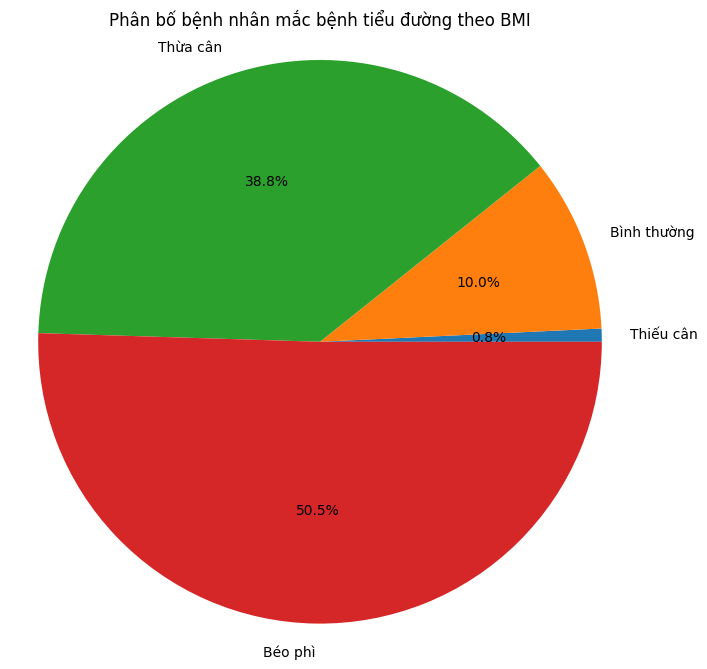

In [ ]:
# Phân loại bệnh nhân theo BMI và đếm số lượng
def classify_and_count(df):
    # Phân loại theo BMI
    bmi_categories = ['Thiếu cân', 'Bình thường', 'Thừa cân', 'Béo phì']
    bmi_ranges = [(0, 18.5), (18.5, 24.9), (25, 29.9), (30, float('inf'))]
    bmi_counts = []
    for category, range in zip(bmi_categories, bmi_ranges):
        count = len(df[(df['bmi'] >= range[0]) & (df['bmi'] < range[1])])
        bmi_counts.append(count)

    # Trả về danh sách số lượng và nhãn
    return bmi_counts, bmi_categories

# Phân loại và đếm bệnh nhân tiểu đường
diabetes_data = df[df['diabetes'] == True]
bmi_counts, bmi_categories = classify_and_count(diabetes_data)

# Tạo biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(bmi_counts, labels=bmi_categories, autopct='%1.1f%%')
plt.title('Phân bố bệnh nhân mắc bệnh tiểu đường theo BMI')
plt.axis('equal')  # Biểu đồ tròn

# Hiển thị biểu đồ
plt.show()

TRÚC - BIỂU ĐỒ NHIỆT

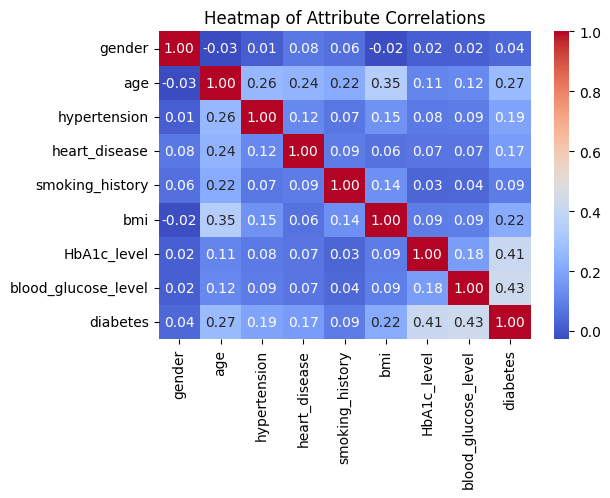

In [ ]:
# Biểu đồ nhiệt (Head map) thể hiện độ tương quan giữa cái thuộc tính.
df5 = df.copy()
# Tính ma trận tương quan
correlation_matrix = df5.corr()

# Vẽ biểu đồ nhiệt
plt.figure(figsize=(6, 4))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Attribute Correlations')
plt.show()

## **4.TRAINING MODEL**

Chia tập huấn luyện

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#Tách biến phụ thuộc ra khỏi tập dữ liệu :
X = df_no_outlier.drop('diabetes', axis=1)
y = df_no_outlier['diabetes']
X = X.values
y = np.array(y)


#Tách tập dữ liệu thành 2 phần (1 phần để train và 1 phần để test) :
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)
print("Size of X_train is:{}\nSize of Y_train is:{}\nSize of X_test is:{}\nSize of Y_test is:{}\n" .format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train

Size of X_train is:(68751, 8)
Size of Y_train is:(68751,)
Size of X_test is:(17188, 8)
Size of Y_test is:(17188,)



array([[  1.  ,  69.  ,   0.  , ...,  29.55,   6.1 , 200.  ],
       [  1.  ,  14.  ,   0.  , ...,  23.5 ,   6.  ,  80.  ],
       [  0.  ,  39.  ,   0.  , ...,  23.96,   4.5 , 159.  ],
       ...,
       [  0.  ,  30.  ,   0.  , ...,  28.38,   4.  , 130.  ],
       [  1.  ,  51.  ,   1.  , ...,  37.58,   3.5 , 100.  ],
       [  1.  ,  19.  ,   0.  , ...,  25.59,   4.5 ,  90.  ]])

Hybrid Methods (Kết hợp thủ công Oversampling và Undersampling) điều chỉnh độ lệch và chạy mô hình

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Oversampling bằng SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Undersampling bằng RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = under_sampler.fit_resample(X_smote, y_smote)

print("Kích thước X sau khi oversampling và undersampling:", X_resampled.shape)
print("Phân phối lớp sau khi cân bằng:", pd.Series(y_resampled).value_counts())

Kích thước X sau khi oversampling và undersampling: (129994, 8)
Phân phối lớp sau khi cân bằng: 0    64997
1    64997
Name: count, dtype: int64




```
# Định dạng của đoạn này là mã
```

1. LOGISTIC REGRESSION:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,precision,recall,f1-score,support
0,0.989260,0.850268,0.914513,16249.000000
1,0.244879,0.840256,0.379236,939.000000
accuracy,0.849721,0.849721,0.849721,0.849721
macro avg,0.617069,0.845262,0.646874,17188.000000
weighted avg,0.948593,0.849721,0.885270,17188.000000


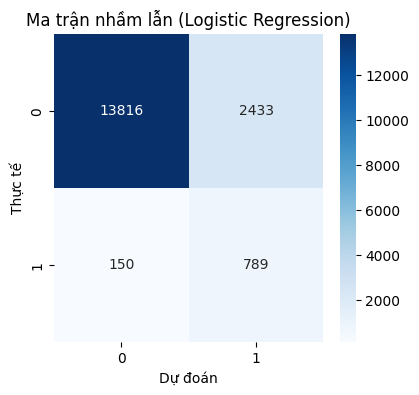

In [ ]:
# Định nghĩa mô hình
models_LG = {
    "Logistic Regression": LogisticRegression(random_state=42)}
# Huấn luyện và đánh giá từng mô hình
for name, model in models_LG.items():
    model.fit(X_resampled, y_resampled)  # Huấn luyện mô hình
    y_pred_logis = model.predict(X_test)  # Dự đoán trên tập test

#Tính ma trận nhầm lẫn :
conf_matrix_logis = confusion_matrix(y_test, y_pred_logis)

# Điều chỉnh kích thước
plt.figure(figsize=(20, 4))


#Trực quan ma trận nhầm lẫn của Logistic Regression :
plt.subplot(1,4,1)
sns.heatmap(conf_matrix_logis, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Ma trận nhầm lẫn (Logistic Regression)')

#Báo cáo phân loại của mô hình Logistic Regression :
logis_report = classification_report(y_test, y_pred_logis, output_dict=True)
df_logis_report = pd.DataFrame(logis_report).transpose()

#Hiển thị kết quả :
df_logis_report

2. RANDOM FOREST:

,precision,recall,f1-score,support
0,0.972601,0.987445,0.979967,16249.000000
1,0.704776,0.518637,0.597546,939.000000
accuracy,0.961834,0.961834,0.961834,0.961834
macro avg,0.838688,0.753041,0.788757,17188.000000
weighted avg,0.957969,0.961834,0.959075,17188.000000


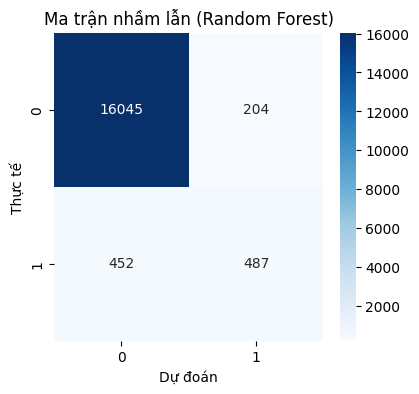

In [ ]:
# Định nghĩa mô hình
models_RF = {
    "Random Forest": RandomForestClassifier(random_state=42)}
# Huấn luyện và đánh giá từng mô hình
for name, model in models_RF.items():
    model.fit(X_resampled, y_resampled)  # Huấn luyện mô hình
    y_pred_rf = model.predict(X_test)  # Dự đoán trên tập test

#Tính ma trận nhầm lẫn :
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Điều chỉnh kích thước
plt.figure(figsize=(20, 4))

#Trực quan ma trận nhầm lẫn của Random Forest :
plt.subplot(1,4,1)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Ma trận nhầm lẫn (Random Forest)')

#Báo cáo phân loại Random Forest :
rf_report = classification_report(y_test, y_pred_rf, output_dict=True)
df_rf_report = pd.DataFrame(rf_report).transpose()

#Hiển thị kết quả :
df_rf_report

3. K-NEAREST NEIGHBORS:

,precision,recall,f1-score,support
0,0.956299,0.997908,0.976660,16249.00000
1,0.853448,0.210863,0.338173,939.00000
accuracy,0.954910,0.954910,0.954910,0.95491
macro avg,0.904873,0.604385,0.657416,17188.00000
weighted avg,0.950680,0.954910,0.941779,17188.00000


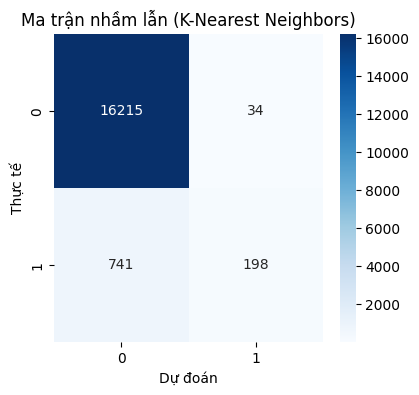

In [ ]:
# Định nghĩa các mô hình
models_KNN = {
    "K-Nearest Neighbors": KNeighborsClassifier()}


# Huấn luyện và đánh giá từng mô hình
for name, model in models_KNN.items():
    model.fit(X_resampled, y_resampled)  # Huấn luyện mô hình
    knn_y_pred = model.predict(X_test)  # Dự đoán trên tập test

# Tạo mô hình KNN với giá trị tốt nhất của k
knn_model = KNeighborsClassifier(n_neighbors=13)
knn_model.fit(X_train, y_train)

# Đưa ra dự đoán trên tập kiểm tra
knn_y_pred = knn_model.predict(X_test)

#Ma trận nhầm lẫn
knn_cnf_matrix = confusion_matrix(y_test, knn_y_pred)


# Điều chỉnh kích thước
plt.figure(figsize=(20, 4))

#Trực quan ma trận nhầm lẫn của K-Nearest Neighbors :
plt.subplot(1,4,1)
sns.heatmap(knn_cnf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Ma trận nhầm lẫn (K-Nearest Neighbors)')

#Báo cáo phân loại K-Nearest Neighbors :
knn_report = classification_report(y_test, knn_y_pred, output_dict=True)
df_knn_report = pd.DataFrame(knn_report).transpose()

#Hiển thị kết quả :
df_knn_report

*4*. NAIVE BAYES:

,precision,recall,f1-score,support
0,0.964506,0.933165,0.948577,16249.000000
1,0.259714,0.405751,0.316708,939.000000
accuracy,0.904352,0.904352,0.904352,0.904352
macro avg,0.612110,0.669458,0.632643,17188.000000
weighted avg,0.926002,0.904352,0.914057,17188.000000


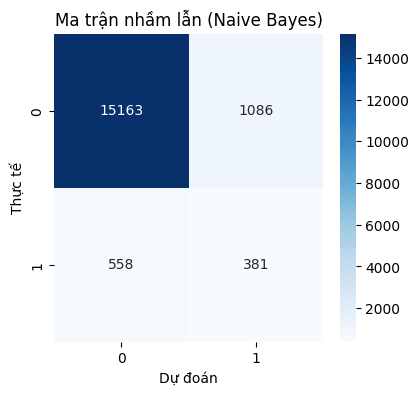

In [ ]:
#Khởi tạo mô hình Naive Bayes :
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Đưa ra dự đoán trên tập kiểm tra
nb_y_pred = nb_model.predict(X_test)

#Ma trận nhầm lẫn
nb_cnf_matrix = confusion_matrix(y_test, nb_y_pred)


# Điều chỉnh kích thước
plt.figure(figsize=(20, 4))

#Trực quan ma trận nhầm lẫn của Naive Bayes :
plt.subplot(1,4,1)
sns.heatmap(nb_cnf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Ma trận nhầm lẫn (Naive Bayes)')

#Báo cáo phân loại Naive Bayes :
nb_report = classification_report(y_test, nb_y_pred, output_dict=True)
df_nb_report = pd.DataFrame(nb_report).transpose()

#Hiển thị kết quả :
df_nb_report

XGBoost

,precision,recall,f1-score,support
0,0.972757,0.995446,0.983971,16249.000000
1,0.867857,0.517572,0.648432,939.000000
accuracy,0.969339,0.969339,0.969339,0.969339
macro avg,0.920307,0.756509,0.816201,17188.000000
weighted avg,0.967026,0.969339,0.965640,17188.000000


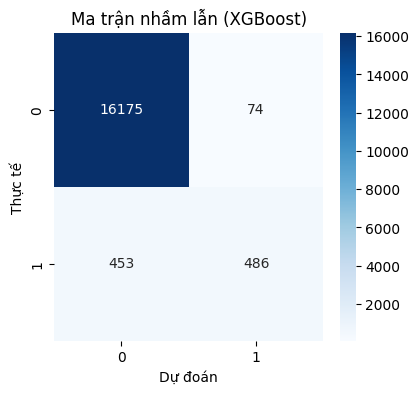

In [ ]:
models_XG = {
    "XGBoost": XGBClassifier(random_state=42)}

  # Huấn luyện và đánh giá từng mô hình
for name, model in models_XG.items():
    model.fit(X_resampled, y_resampled)  # Huấn luyện mô hình
    y_pred_xg = model.predict(X_test)  # Dự đoán trên tập test


#Tính ma trận nhầm lẫn :
conf_matrix_xg = confusion_matrix(y_test, y_pred_xg)

# Điều chỉnh kích thước
plt.figure(figsize=(20, 4))

#Trực quan ma trận nhầm lẫn của XGBoost :
plt.subplot(1,4,1)
sns.heatmap(conf_matrix_xg, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Ma trận nhầm lẫn (XGBoost)')

#Báo cáo phân loại XGBoost :
xg_report = classification_report(y_test, y_pred_xg, output_dict=True)
df_xg_report = pd.DataFrame(xg_report).transpose()

#Hiển thị kết quả :
df_xg_report

# ĐÁNH GIÁ HIỆU SUẤT MÔ HÌNH

Độ chính xác của mô hình Logistic Regression :  0.85
Độ chính xác của mô hình Random Forest :  0.96
Độ chính xác của mô hình K-Nearest Neighbors :  0.95
Độ chính xác của mô hình Naive Bayes :  0.90
Độ chính xác của mô hình XGBoost :  0.90


Logistic Regression                                    \
                       precision    recall  f1-score       support   
0                       0.989260  0.850268  0.914513  16249.000000   
1                       0.244879  0.840256  0.379236    939.000000   
accuracy                0.849721  0.849721  0.849721      0.849721   
macro avg               0.617069  0.845262  0.646874  17188.000000   
weighted avg            0.948593  0.849721  0.885270  17188.000000   

             Random Forest                                    \
                 precision    recall  f1-score       support   
0                 0.972601  0.987445  0.979967  16249.000000   
1                 0.704776  0.518637  0.597546    939.000000   
accuracy          0.961834  0.961834  0.961834      0.961834   
macro avg         0.838688  0.753041  0.788757  17188.000000   
weighted avg      0.957969  0.961834  0.959075  17188.000000   

             K_Nearest Neighbors                                  Naive Bayes  \
                       precision    recall  f1-score      support   precision   
0                       0.956299  0.997908  0.976660  16249.00000    0.964506   
1                       0.853448  0.210863  0.338173    939.00000    0.259714   
accuracy                0.954910  0.954910  0.954910      0.95491    0.904352   
macro avg               0.904873  0.604385  0.657416  17188.00000    0.612110   
weighted avg            0.950680  0.954910  0.941779  17188.00000    0.926002   

                                                 XGBoost                      \
                recall  f1-score       support precision    recall  f1-score   
0             0.933165  0.948577  16249.000000  0.972757  0.995446  0.983971   
1             0.405751  0.316708    939.000000  0.867857  0.517572  0.648432   
accuracy      0.904352  0.904352      0.904352  0.969339  0.969339  0.969339   
macro avg     0.669458  0.632643  17188.000000  0.920307  0.756509  0.816201   
weighted avg  0.904352  0.914057  17188.000000  0.967026  0.969339  0.965640   

                            
                   support  
0             16249.000000  
1               939.000000  
accuracy          0.969339  
macro avg     17188.000000  
weighted avg  17188.000000

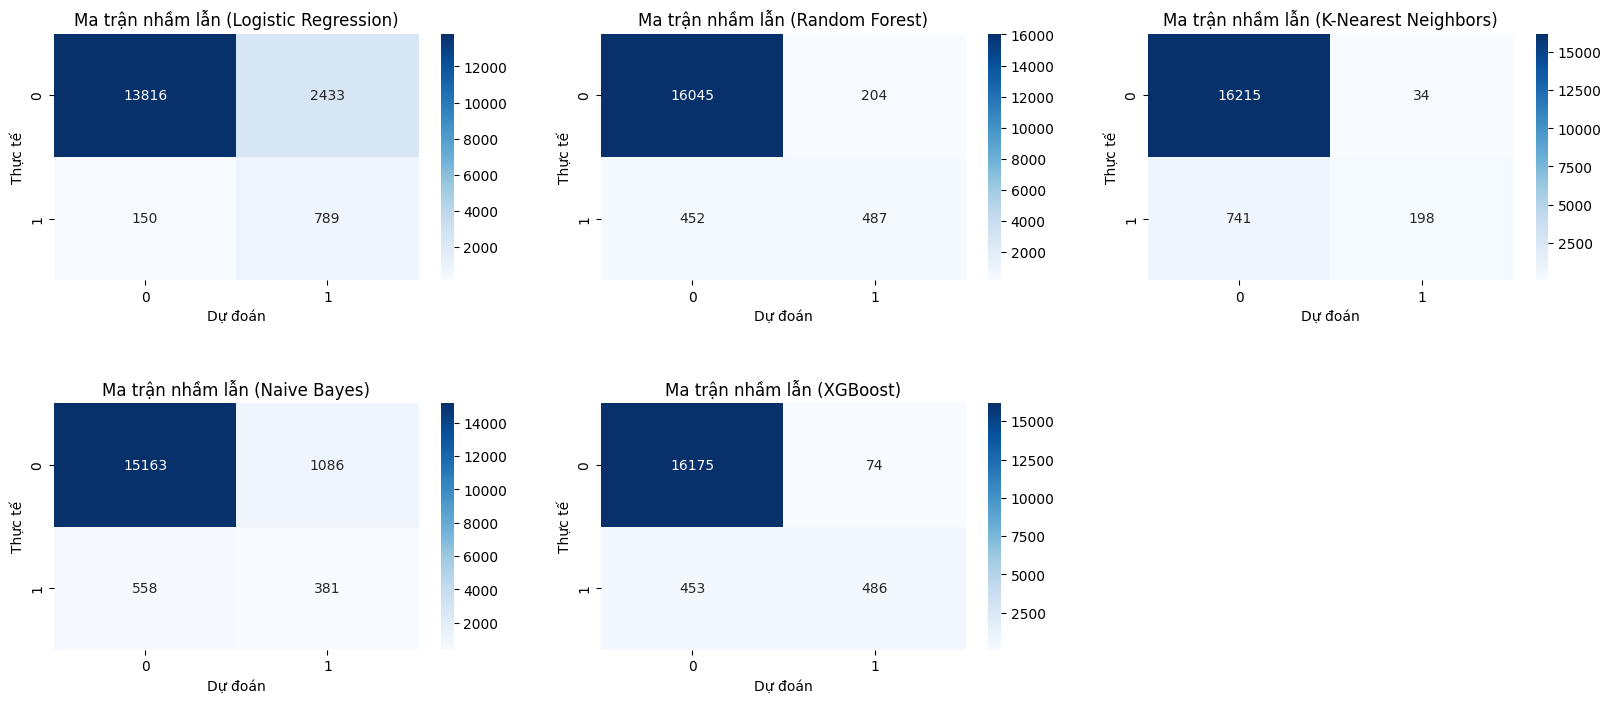

In [ ]:
# Điều chỉnh kích thước
plt.figure(figsize=(20, 8))


#Trực quan ma trận nhầm lẫn của Logistic Regression :
plt.subplot(2,3,1)
sns.heatmap(conf_matrix_logis, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Ma trận nhầm lẫn (Logistic Regression)')


#Trực quan ma trận nhầm lẫn của Random Forest :
plt.subplot(2,3,2)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Ma trận nhầm lẫn (Random Forest)')

#Trực quan ma trận nhầm lẫn của K-Nearest Neighbors :
plt.subplot(2,3,3)
sns.heatmap(knn_cnf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Ma trận nhầm lẫn (K-Nearest Neighbors)')


#Trực quan ma trận nhầm lẫn của Naive Bayes :
plt.subplot(2,3,4)
sns.heatmap(nb_cnf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Ma trận nhầm lẫn (Naive Bayes)')


#Trực quan ma trận nhầm lẫn của XGBoost :
plt.subplot(2,3,5)
sns.heatmap(conf_matrix_xg, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Ma trận nhầm lẫn (XGBoost)')



#Đánh giá hiệu suất mô hình :
accuracy_logistic = accuracy_score(y_test, y_pred_logis)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_knn = accuracy_score(y_test, knn_y_pred)
accuracy_nb = accuracy_score(y_test, nb_y_pred)
accuracy_xg = accuracy_score(y_test, nb_y_pred)


# Điều chỉnh khoảng cách giữa các hàng
plt.subplots_adjust(hspace=0.5)

print(f'Độ chính xác của mô hình Logistic Regression : {accuracy_logistic : .2f}')
print(f'Độ chính xác của mô hình Random Forest : {accuracy_rf : .2f}')
print(f'Độ chính xác của mô hình K-Nearest Neighbors : {accuracy_knn : .2f}')
print(f'Độ chính xác của mô hình Naive Bayes : {accuracy_nb : .2f}')
print(f'Độ chính xác của mô hình XGBoost : {accuracy_xg : .2f}')


#Báo cáo phân loại của mô hình Logistic Regression :
logis_report = classification_report(y_test, y_pred_logis, output_dict=True)
df_logis_report = pd.DataFrame(logis_report).transpose()

#Báo cáo phân loại Random Forest :
rf_report = classification_report(y_test, y_pred_rf, output_dict=True)
df_rf_report = pd.DataFrame(rf_report).transpose()

#Báo cáo phân loại Random Forest :
knn_report = classification_report(y_test, knn_y_pred, output_dict=True)
df_knn_report = pd.DataFrame(knn_report).transpose()

#Báo cáo phân loại Naive Bayes :
nb_report = classification_report(y_test, nb_y_pred, output_dict=True)
df_nb_report = pd.DataFrame(nb_report).transpose()

#Báo cáo phân loại XGBoost :
xg_report = classification_report(y_test, y_pred_xg, output_dict=True)
df_xg_report = pd.DataFrame(xg_report).transpose()


#Kết hợp các DataFrame :
combined_df = pd.concat([df_logis_report, df_rf_report, df_knn_report,df_nb_report,df_xg_report], keys=['Logistic Regression', 'Random Forest', 'K_Nearest Neighbors','Naive Bayes','XGBoost'], axis=1)

#Hiển thị kết quả :
combined_df

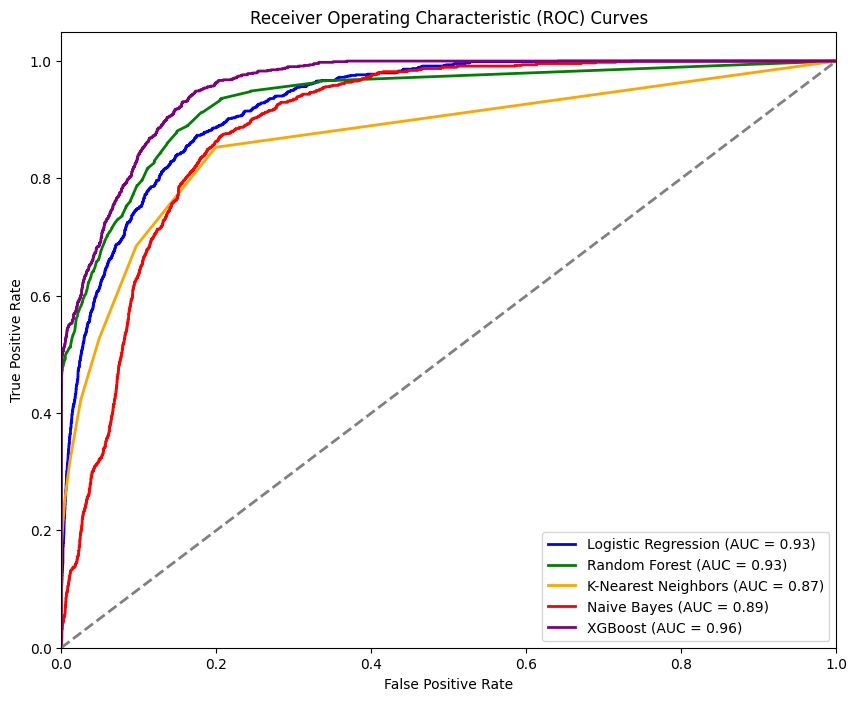

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Tính toán xác suất dự đoán cho từng mô hình
y_pred_proba_logis = models_LG["Logistic Regression"].predict_proba(X_test)[:, 1]
y_pred_proba_rf = models_RF["Random Forest"].predict_proba(X_test)[:, 1]
y_pred_proba_knn = knn_model.predict_proba(X_test)[:, 1]
y_pred_proba_nb = nb_model.predict_proba(X_test)[:, 1]
y_pred_proba_xg = models_XG["XGBoost"].predict_proba(X_test)[:, 1]

# Tính toán đường cong ROC và AUC cho từng mô hình
fpr_logis, tpr_logis, _ = roc_curve(y_test, y_pred_proba_logis)
roc_auc_logis = auc(fpr_logis, tpr_logis)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_proba_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

fpr_xg, tpr_xg, _ = roc_curve(y_test, y_pred_proba_xg)
roc_auc_xg = auc(fpr_xg, tpr_xg)

# Vẽ biểu đồ ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr_logis, tpr_logis, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_logis)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_knn, tpr_knn, color='orange', lw=2, label='K-Nearest Neighbors (AUC = %0.2f)' % roc_auc_knn)
plt.plot(fpr_nb, tpr_nb, color='red', lw=2, label='Naive Bayes (AUC = %0.2f)' % roc_auc_nb)
plt.plot(fpr_xg, tpr_xg, color='purple', lw=2, label='XGBoost (AUC = %0.2f)' % roc_auc_xg)

# Vẽ đường chéo
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

PREDICT WITH A NEW INPUT

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_group
0,0,80.0,0,1,0,25.19,6.6,140,0,61+
1,0,54.0,0,0,0,27.32,6.6,80,0,41-60
2,1,28.0,0,0,0,27.32,5.7,158,0,21-40
3,0,36.0,0,0,1,23.45,5.0,155,0,21-40
4,1,76.0,1,1,1,20.14,4.8,155,0,61+


In [ ]:
df_test = pd.read_excel('/content/drive/MyDrive/SIC/testpredictfull.xlsx')
df_test.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,45,1,0,0,27.5,6.5,140,1
1,0,50,0,1,1,30.0,7.2,160,1
2,1,35,1,0,0,24.0,5.8,130,0
3,0,60,1,1,1,31.2,8.1,180,1
4,1,40,0,0,1,22.0,5.6,125,0


In [ ]:
import xgboost as xgb
model = XGBClassifier(random_state=42)
model.fit(X_resampled, y_resampled)  # Huấn luyện mô hình
model.save_model('xgboost_model.json')  # Lưu mô hình

model = XGBClassifier()  # Khởi tạo mô hình
model.load_model('xgboost_model.json')  # Tải mô hình từ file

import pandas as pd
from xgboost import XGBClassifier

# Đọc dữ liệu từ file Excel
file_path = 'path_to_your_excel_file.xlsx'
datatest = pd.read_excel('/content/drive/MyDrive/SIC/testpredictfull.xlsx')

# Tải mô hình đã được huấn luyện
model = XGBClassifier()
model.load_model('xgboost_model.json')  # Đọc mô hình đã được huấn luyện

# Chuẩn bị dữ liệu cho dự đoán
X_new = datatest.loc[:, ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
y_true = datatest['diabetes']

# Dự đoán trên dữ liệu mới
y_pred_new = model.predict(X_new)

# Kết hợp các thuộc tính đầu vào với dự đoán
result_df = X_new.copy()  # Sao chép dữ liệu đầu vào
result_df['diabetes'] = y_true  # Thêm cột giá trị mục tiêu

result_df['Predicted'] = y_pred_new  # Thêm cột dự đoán

# Kiểm tra dữ liệu sau khi dự đoán
result_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,Predicted
0,1,45,1,0,0,27.5,6.5,140,1,0
1,0,50,0,1,1,30.0,7.2,160,1,1
2,1,35,1,0,0,24.0,5.8,130,0,0
3,0,60,1,1,1,31.2,8.1,180,1,1
4,1,40,0,0,1,22.0,5.6,125,0,0
5,0,55,1,1,0,29.5,6.9,150,1,1
6,1,30,0,0,0,23.0,5.4,120,0,0
7,0,65,1,0,1,32.0,7.5,170,1,1
8,1,50,0,1,0,26.0,6.0,140,1,0
9,0,45,1,0,1,28.0,6.8,155,0,1


In [ ]:
df_test = pd.DataFrame(result_df)

matching_count = (df_test['diabetes'] == df_test['Predicted']).sum()
matching_count1 = (df_test['diabetes'] != df_test['Predicted']).sum()


print(f"Số lượng hàng có giá trị 'diabetes' và 'Predicted' bằng nhau: {matching_count}")
print(f"Số lượng hàng có giá trị 'diabetes' và 'Predicted' khác bằng nhau: {matching_count1}")

Số lượng hàng có giá trị 'diabetes' và 'Predicted' bằng nhau: 34
Số lượng hàng có giá trị 'diabetes' và 'Predicted' khác bằng nhau: 9
